# Lab: Gradient Descent and Stochastic Gradient Descent

Import first all these librairies   

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for nicer plots
import math
sns.set_theme()

In this lab, we aim to apply GD and SGD to some particular functions

## I. Application on a one-dimensional case

We fist start with applying GD to the one-dimensional function: 
$$
f_1: w \mapsto w^2 -w/2+1- \log[1+\exp(w/2+1)].
$$


Q1. First plot this function on $[-1,1]$.

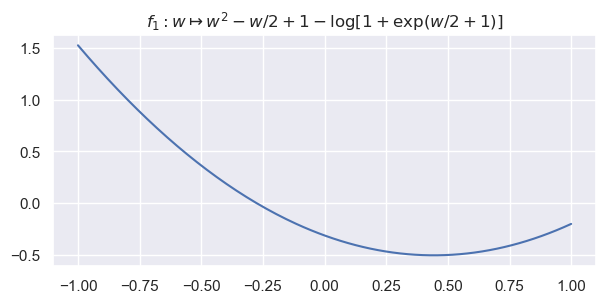

In [61]:
def f1(w):
    return(w**2 -(w/2) +1 -np.log(1+np.exp((w/2) +1)))

w = np.linspace(-1,1,200)

plt.figure(figsize=(7,3))
plt.plot(w,f1(w))
plt.title("$f_1: w \mapsto w^2 -w/2+1- \log[1+\exp(w/2+1)]$")
plt.show()

Q2. Compute the derivative of $f_1$ and implement this  function.

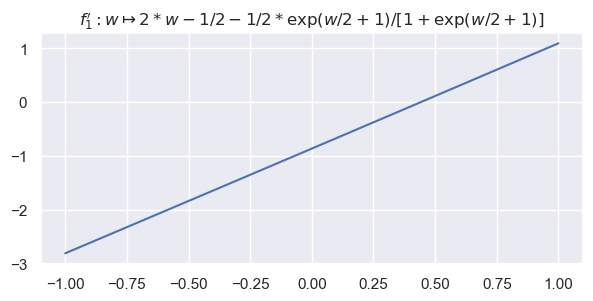

In [62]:
def derivative_f1(w):
    return 2*w - 1/2 - ( (1/2)*(np.exp((w/2)+1))/(1+(np.exp((w/2)+1)))  )

plt.figure(figsize=(7,3))
plt.plot(w,derivative_f1(w))
plt.title("$f_1': w \mapsto 2*w -1/2 -1/2*\exp(w/2+1) / [1+\exp(w/2+1)]$")
plt.show()

Q3. Is $f_1$ convex? 

**$f_1'$ is growing ( croissant ) so $f_1''>0$ therefore $f_1$ is convex**

Q4. We aim to apply GD to $f_1$. Implement a function which takes as input 
- the derivative of the function to minimize
- an initial condition
- a stepsize/learning rate 
- a number of iterations

and ouputs

- the list of iterates of GD
- the list of the evaluations of the derivative of the function at the iterates

In [63]:
def gradient_descent_dim1(derivative, initial_condition, step_size, num_iterations):
    x = initial_condition
    
    iterates = [x]
    derivative_evaluations = [derivative(x)]
    
    for _ in range(num_iterations):
        x = x - step_size*derivative(x)
        
        iterates.append(x)
        derivative_evaluations.append(derivative(x))
    
    return iterates, derivative_evaluations

Q5. Apply GD to $f_1$ and plot the iterates and the functions at the iterates.

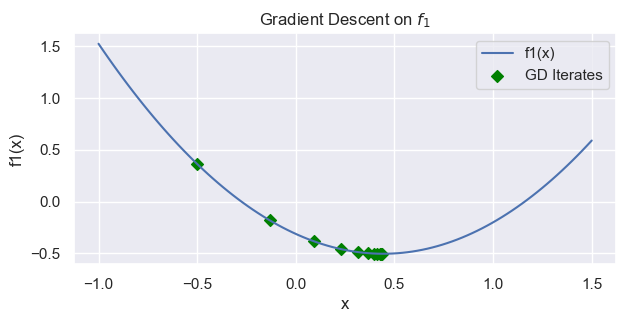

In [64]:
# Set up parameters
initial_condition = -1/2
step_size = 0.2
num_iterations = 10

# Apply GD to f1
iterates, derivative_evaluations = gradient_descent_dim1(derivative_f1, initial_condition, step_size, num_iterations)

# Plot the function and iterates
x_values = np.linspace(-1, 1.5, 100)
y_values = f1(x_values)

plt.figure(figsize=(7,3))
plt.plot(x_values, y_values, label='f1(x)')
plt.scatter(iterates, [f1(x) for x in iterates], marker='D', color='green', label='GD Iterates')
plt.title('Gradient Descent on $f_1$')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.legend()
plt.show()


Beause of the convexity of f1, the gradient descent method converges to the unique minimizer of f1.

We now consider the one-dimensional function: 
$$
f_2 : w \mapsto w^2 + \cos(2\pi w) -\log(1+4 w^2) +w.
$$
Q7. First plot this function on $[-3,3]$.

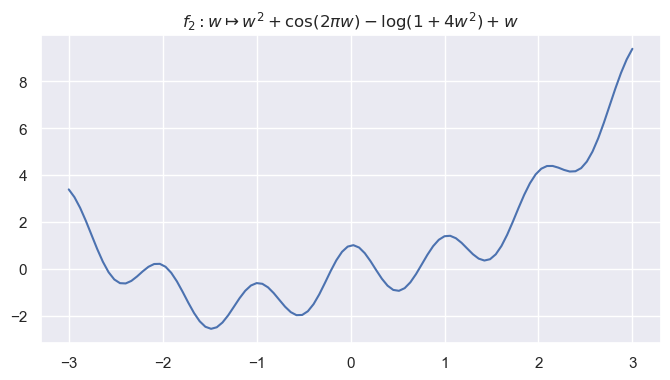

In [65]:
def f2(w):
    return w**2 + np.cos(2 * np.pi * w) - np.log(1 + 4 * w**2) + w

w = np.linspace(-3,3,100)

plt.figure(figsize=(8, 4))
plt.plot(w,f2(w))
plt.title("$f_2 : w \mapsto w^2 + \cos(2\pi w) -\log(1+4 w^2) +w$")
plt.show()

Q8. Is this function is convex?

No $f_2$ is not convex.
$f_2$ first derivative with respect to w is $f_2'$= 2w - 2πsin(2πw) - 8w/(1 + 4w^2) + 1 

$f_2$ second derivative with respect to w is $f_2''$(w) = 2-4*$π^2$*cos(2*π*w)- (8*(1 + 4 * w^2)-8*w*(8 * w))/(1 + 4 * w^2)^2

Indeed, $f_2''$ is not necesarilly positive ( for  w=0 $f_2''$(w)<0 ) 

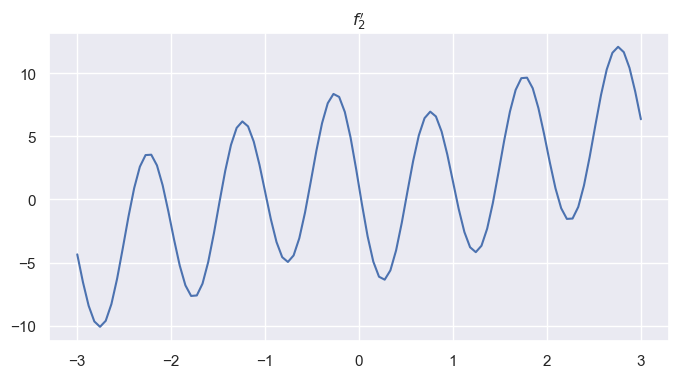

In [66]:
def derivative_f2(w):
    return 2*w + 1 - (8*w)/(1+4*w**2) - 2*np.pi*np.sin(w*2*np.pi)

plt.figure(figsize=(8,4))
plt.plot(w,derivative_f2(w))
plt.title("$f_2'$")
plt.show()

Q9. Apply GD using different initialization and plot the evaluation of $f_2$ at the resulting iterates.

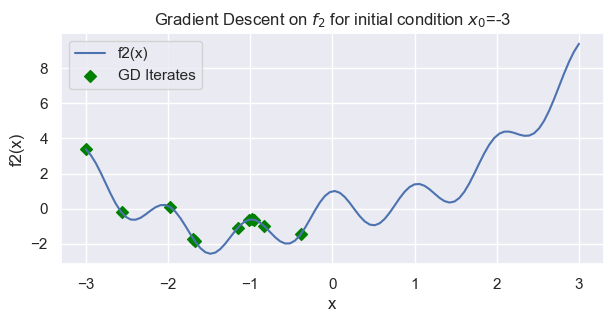

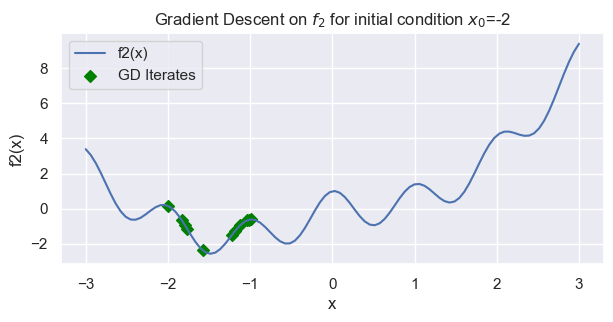

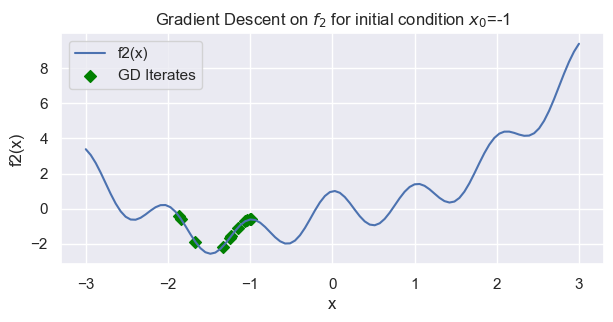

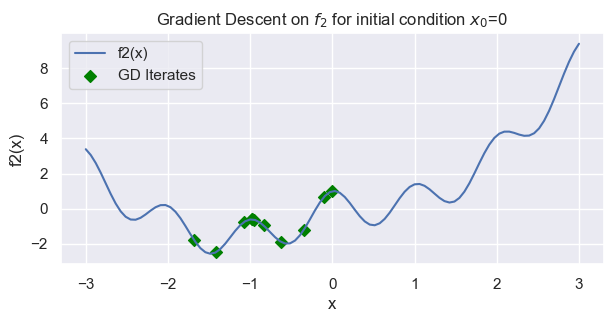

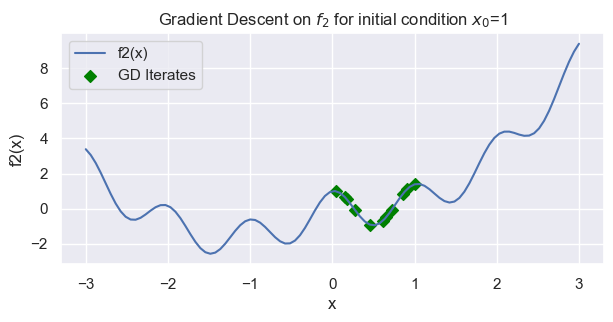

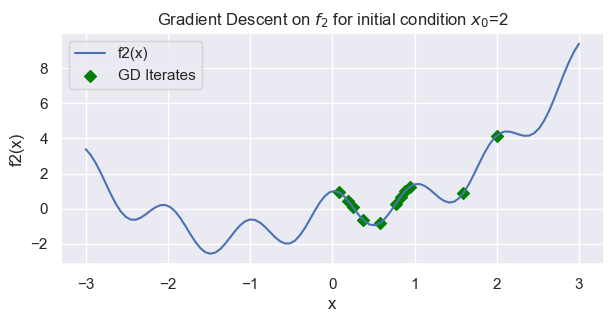

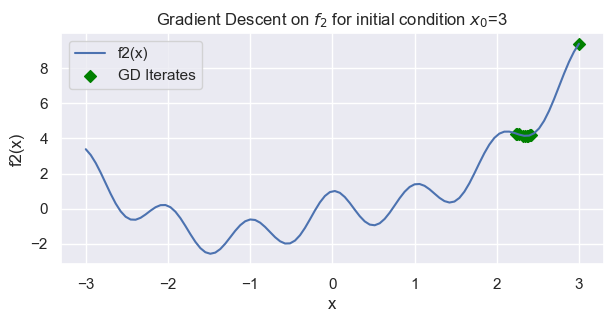

In [67]:
# Plotting the GD for different initialization vectors

initial_conditions = np.arange(-3, 4)
step_size = 0.1
num_iterations = 10

# Plot the function and iterates
x_values = np.linspace(-3, 3, 100)
y_values = f2(x_values)


for initialization in initial_conditions:
    # Apply GD to f2
    iterates, derivative_evaluations= gradient_descent_dim1(derivative_f2, initialization, step_size, num_iterations)
    plt.figure(figsize=(7, 3))
    plt.plot(x_values, y_values, label='f2(x)')
    plt.scatter(iterates, [f2(x) for x in iterates], marker='D', color='green', label='GD Iterates')
    plt.title('Gradient Descent on $f_2$ for initial condition $x_0$=' + str(initialization))
    plt.xlabel('x')
    plt.ylabel('f2(x)')
    plt.legend()
    plt.show()


The fact that $f_2$ is non-convex implies that depending on the initialization point, the descent gradient method doesn't converge necesarilly to the global minimizer of the function but to a local minimizer of $f_2$

## II. Application on the Rosenbrock function

In this part, we consider the function
$$
f_3 : w \mapsto (w_1-1)^2 + 100(w_1^2-w_2)^2 \, ,
$$
called the Rosenbrock function.

Q10. Plot the contour lines of this function.

The contour plot provides a visual aid for understanding the landscape of the Rosenbrock function and can be helpful for analyzing optimization behavior or searching for the minimum of the function.

In [68]:
# Define the Rosenbrock function f(x,y)=(1-x)^2+100(y-x^2)^2

def f3(w1, w2):
    return (w1 - 1)**2 + 100 * (w1**2 - w2)**2


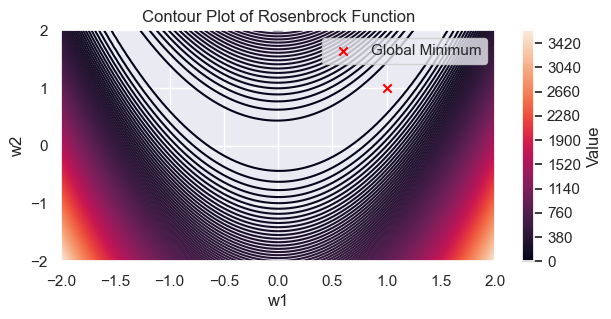

In [69]:
# Generate values for w1 and w2
w1_values = np.linspace(-2, 2, 100)  #-2 and 2 are the extreme points in the x-axis
w2_values = np.linspace(-2, 2, 100)  #-2 and 2 are the extreme points in the y-axis

# Create a meshgrid of w1 and w2 values
W1, W2 = np.meshgrid(w1_values, w2_values)

# Compute the corresponding function values
Z = f3(W1, W2)   #A matrix Z where each element Z[i, j] represents the function value at the point (W1[i, j], W2[i, j]).

# Plot the contour lines
plt.figure(figsize=(7, 3))

plt.title('Contour Plot of Rosenbrock Function')
plt.xlabel('w1')
plt.ylabel('w2')

# Plot the contour lines
contour = plt.contour(W1, W2, Z, levels=200)
plt.colorbar(contour, label="Value")

# Add a marker at the minimum (we find it in the next question)
plt.scatter(1, 1, color='red', marker='x', label='Global Minimum')
plt.legend()

plt.show()


Q11. Is $f_3$ admits a unique minimizer? If so find it.

**f3 is a positive function and $f_3(1,1)=0$, the unique minimizer of $f_3$ is 0, reached at point $(1,1)$**

$$f_3 : w \mapsto (w_1-1)^2 + 100(w_1^2-w_2)^2 \, ,$$

$$ \frac{\partial f_3}{\partial w_1} = 2(w_1-1) + 400(w_1^2 - w_2)w_1 $$
$$ \frac{\partial f_3}{\partial w_2} = -200(w_1^2 - w_2) $$

Setting the two partial derivatives to 0 we obtain the following system:

$$ \begin{cases}
    2(w_1-1) + 400(w_1^2 - w_2)w_1 = 0\\
    -200(w_1^2 - w_2) = 0
    \end{cases}
$$ 

$$ \begin{cases}
    w_1 = 1\\
    w_2 = 1
    \end{cases}
$$


The hessian matrix H is 
$$ H = \left[ {\begin{array}{cc}
    2 + 1200w_1^2 - 400w_2 & -400w1 \\
    -400w1 & 200 \\
  \end{array} } \right]
$$

H is positive definite. <br>

Hence the function is convex and therefore $ w = (1,1) $  is a local minimizer. However, because $ w = (1,1) $ is the unique stationary point of $f_3$, then it is the unique minimizer


Q12. Apply GD to $f_3$ for different choice of learning rates and starting from $w_0 = (-1,1)$. Comment your results.

In [70]:
# Defining the gradient
def derivative_f3(w):   #Here it is a gradient
    return np.array([2 * (w[0] - 1) + 400 * (w[0]**2 - w[1]) * w[0], 200 * (w[1] - w[0]**2)])



In [71]:
# Gradient Descent implementation
def gradient_descent(f_prime, x_0, step_size, n_iter):
    if isinstance(x_0, np.ndarray):
        x = np.zeros((n_iter + 1, x_0.shape[0]))
        f_prime_eval = np.zeros((n_iter + 1, x_0.shape[0]))

        x[0] = x_0
        f_prime_eval[0] = f_prime(x_0)

        for i in range(1, n_iter + 1):
            x[i] = x[i - 1] - step_size * f_prime_eval[i - 1]
            f_prime_eval[i] = f_prime(x[i])

        return x, f_prime_eval

    else:
        x = np.zeros(n_iter + 1)
        x[0] = x_0

        for i in range(1, n_iter + 1):
            x[i] = x[i - 1] - step_size * f_prime(x[i - 1])

        return x, f_prime(x)

In [72]:
# function to create visualization of the gradient descent
def visu(step):
    w1_values = np.linspace(-2, 2, 100) 
    w2_values = np.linspace(-2, 2, 100) 

    # Create a meshgrid of w1 and w2 values
    W1, W2 = np.meshgrid(w1_values, w2_values)

    # Compute the corresponding function values
    Z = f3(W1, W2)

    # Perform gradient descent
    x,_ = gradient_descent(derivative_f3, w0, step, num_iterations)


    # Plot the contour lines
    plt.figure(figsize=(8, 4))
    plt.title(f'Contour Plot of Rosenbrock Function with GD (Step Size = {step})')
    plt.xlabel('w1')
    plt.ylabel('w2')
    # Ajoutez un repère au minimum
    plt.scatter(1, 1, color='red', marker='D', label='Minimum Global')
    # Plot the contour lines
    contour = plt.contour(W1, W2, Z, levels=200)
    plt.colorbar(contour, label="Value")


    # Plot the trajectory on the contour plot
    plt.plot(x[:, 0], x[:, 1], marker='x' , label='Gradient Descent Trajectory', color='green')
    plt.legend()
    plt.show()

    # compute error between minimum value [1,1] and the last output of the GD algorithm
    error = np.linalg.norm(x - np.array([1, 1]), axis=1)
    error = np.minimum(error[-1],10)
    print("Error between the global mininmum and the last computed by the gradient descent ", round(error,3))

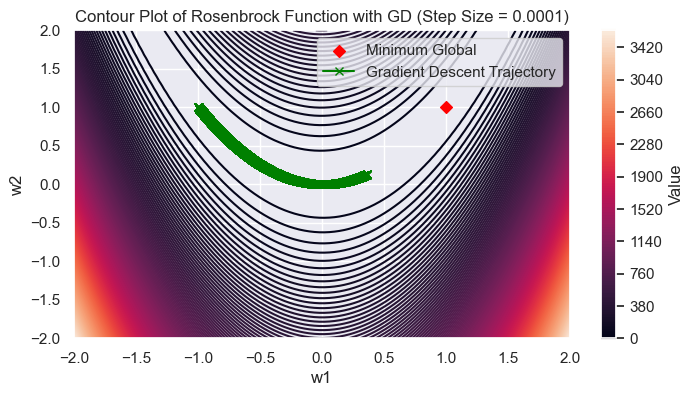

Error between the global mininmum and the last computed by the gradient descent  1.079


In [73]:
# Set initial conditions
w0 = np.array([-1, 1])
num_iterations = 10000

visu(0.0001)


Here we see that fora step_size that is too small, we have a convergence to the unique minimizer but we need more itération to achieve this point

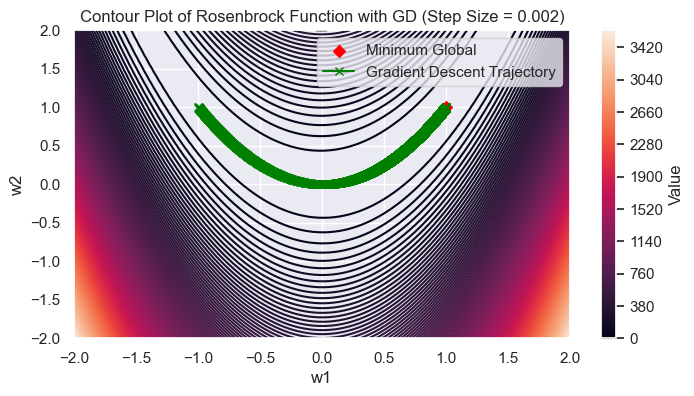

Error between the global mininmum and the last computed by the gradient descent  0.0


In [74]:
visu(0.002)

**We observe that for step_size that are too big the Gradient Descent algorithm does not converge.**

/var/folders/cg/ltgc1bw91_q800mfcy5vfvkw0000gn/T/ipykernel_65337/2060533361.py:3: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([2 * (w[0] - 1) + 400 * (w[0]**2 - w[1]) * w[0], 200 * (w[1] - w[0]**2)])
/var/folders/cg/ltgc1bw91_q800mfcy5vfvkw0000gn/T/ipykernel_65337/4017432629.py:11: RuntimeWarning: invalid value encountered in subtract
  x[i] = x[i - 1] - step_size * f_prime_eval[i - 1]


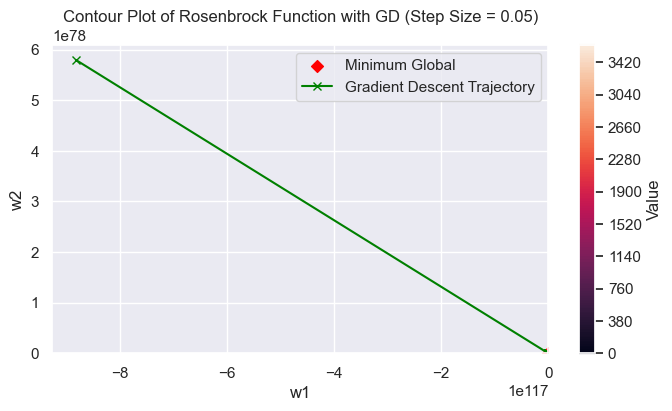

Error between the global mininmum and the last computed by the gradient descent  nan


In [75]:
visu(0.05)

As we can see on the graph and as the warnings try to warn us, for a step_size too large, the value taken by the points of the gradietn descent are too large or too small. 

# III. Stochastic Gradient Descent for regression

Here we consider the regression problem:
$$
Y = w_0 + w_1 X + \epsilon \, , \, \epsilon \sim \mathrm{N}(0,1) \, .
$$
Therefore, we have to minimize a function $E$ of the form
$$
E(w) = \sum_{i=1}^N E_i(w) \, ,
$$
where $N$ is the number of datapoints and $E_i$ is a function of the $i$-th datapoint.

Q13. Generate some synthetic data. Plot the training data and the regression line.

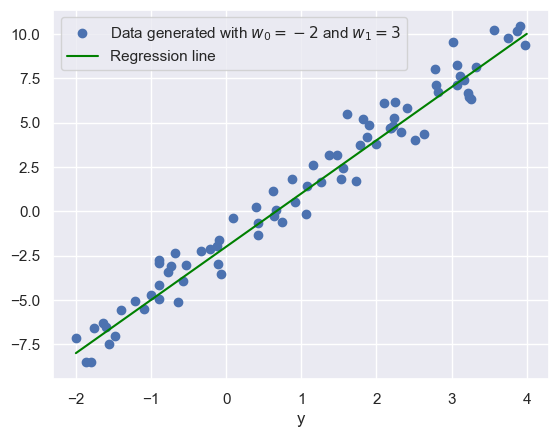

In [100]:
def generate_data(n):
    x = np.random.uniform(low=-2, high=4, size=n)
    x = np.sort(x)
    noise = np.random.randn(n)
    w0, w1 = -2, 3
    y = w0 + w1*x + noise
    data = (x, y)
    return data


x, y = generate_data(80)

fig, ax = plt.subplots()

#Plot the Data
ax.scatter(x, y, label="Data generated with $w_0 = -2$ and $w_1 =3$")

#Plot the regression line
x_line = np.linspace(-2, 4, 100)
y_line = -2 +3*x_line
ax.plot(x_line, y_line, c="green", label="Regression line")

ax.set_xlabel("x")
ax.set_xlabel("y")
ax.legend()
plt.show()


Q.14 Use GD to estimate the regression line.

In [101]:
#We define the error function
def error(w):
    return (1/x.shape[0])*np.linalg.norm(y - (w[0] + w[1]*x))**2


#We define the gradient of the error function
def gradient_error(w):
    result = np.zeros((2))

    for i in range(x.shape[0]):
        result[0] += y[i] - w[0] - w[1]*x[i]
        result[1] += (y[i] - w[0] - w[1]*x[i])*x[i]

    result = (-2/x.shape[0])*result
    return result

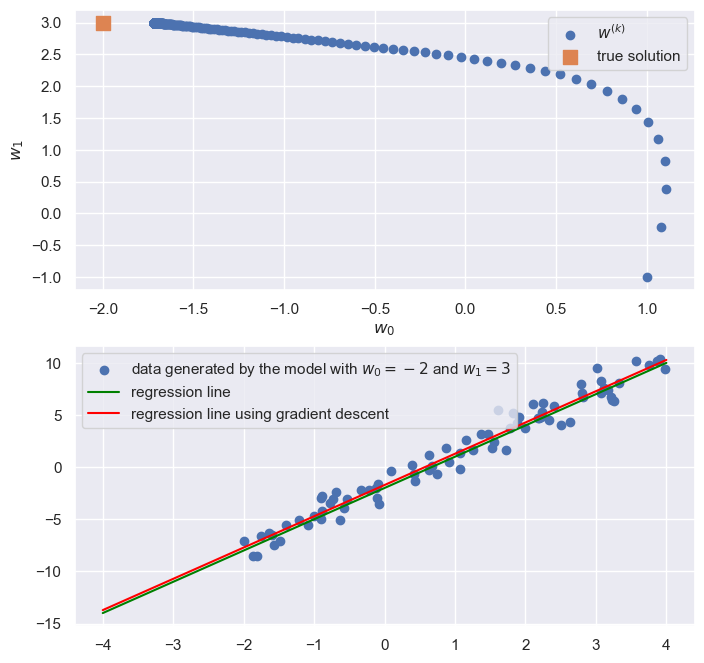

In [102]:
#We perform the gradient descent on the linear regression problem
w, _ = gradient_descent(gradient_error, np.array([1, -1]), step_size=0.03, n_iter=1000)
x_line = np.linspace(-4, 4, 200)

#Compute the Regression line using the gradient descent
y_line_gd = w[-1, 0] + w[-1, 1]*x_line

#Xompute the regression line 
y_line = -2 +3*x_line


fig, ax = plt.subplots(2, 1, figsize=(8,8))
ax[0].scatter(w[:, 0], w[:, 1], label="$w^{(k)}$")
ax[0].scatter(-2, 3, marker="s", s=100, label="true solution")
ax[0].set_xlabel("$w_0$")
ax[0].set_ylabel("$w_1$")
ax[0].legend()

# PLot of the data,the regression line and the regression line using gradient descent
ax[1].scatter(x, y, label="data generated by the model with $w_0 = -2$ and $w_1 =3$")
ax[1].plot(x_line, y_line, c="green", label="regression line")
ax[1].plot(x_line, y_line_gd, label="regression line using gradient descent", c="red")
ax[1].legend()


plt.show()

Q15 Estimate the convergence rate of the gradient descent algorithm.

We first check for quadratic convergence. We say the sequence converges at a quadratic rate if there exists some constant $ 0<M<\infty$ such that  $$ratio = \frac{\|x_{n+1}-x_\infty\|}{\|x_n-x_\infty\|^2}\leq M$$ for n sufficiently large.


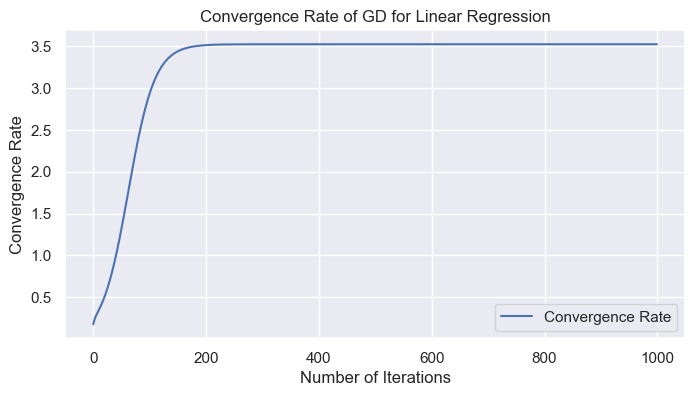

In [103]:
# Convergence rate of the GD for the regression line problem
w_star = np.array([-2, 3])
ratio = []


for i in range(w.shape[0]-1):
    numerateur  = np.linalg.norm(w[i+1]-w_star)
    denominateur = (np.linalg.norm(w[i]-w_star))**2
    ratio.append(numerateur/denominateur)
    

    
# Plot of the convergence rate
fig, ax = plt.subplots(figsize=(8, 4))   
ax.set_title("Convergence Rate of GD for Linear Regression")
ax.plot(ratio, label='Convergence Rate')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Convergence Rate')
ax.legend()
plt.show()

We can take M=100 on the above definition and we have a graph showing that convergence rate is quadratic 

Also, the choice of the learning rate is crucial. If the learning rate is too small, the convergence will be slow, but if it's too large, the algorithm may oscillate or fail to converge. We may need to experiment with different learning rates to find the optimal one for your specific problem.

Q14 Apply random batch SGD for this regression problem:
$$
w_{n+1} = w_n - \eta \nabla E_{I_{n+1}}(w_n) \, ,
$$
where $(I_n)_n$ is a sequence of iid random variables uniform on $\{1,\ldots,N\}$.

In [104]:
def error_prime(w, X, Y):
    result = np.zeros((2))

    for i in range(X.shape[0]):
        result[0] += Y[i] - w[0] - w[1]*X[i]
        result[1] += (Y[i] - w[0] - w[1]*X[i])*X[i]

    result = (-2/X.shape[0])*result
    return result


In [105]:
def batch_SGD(X, Y, f_prime, x_0, step_size, n_iter, batch_size=1,):
    
    x = np.zeros((n_iter+1, x_0.shape[0]))
    f_eval = np.zeros((n_iter+1, x_0.shape[0]))
    x[0] = x_0

    # batch algorithm
    for i in range(1, n_iter+1):

        index = np.arange(X.shape[0])
        batch = np.random.choice(index, batch_size, replace=False)
        x[i] = x[i-1] - step_size*error_prime(x[i-1], X[batch], Y[batch])

    return x

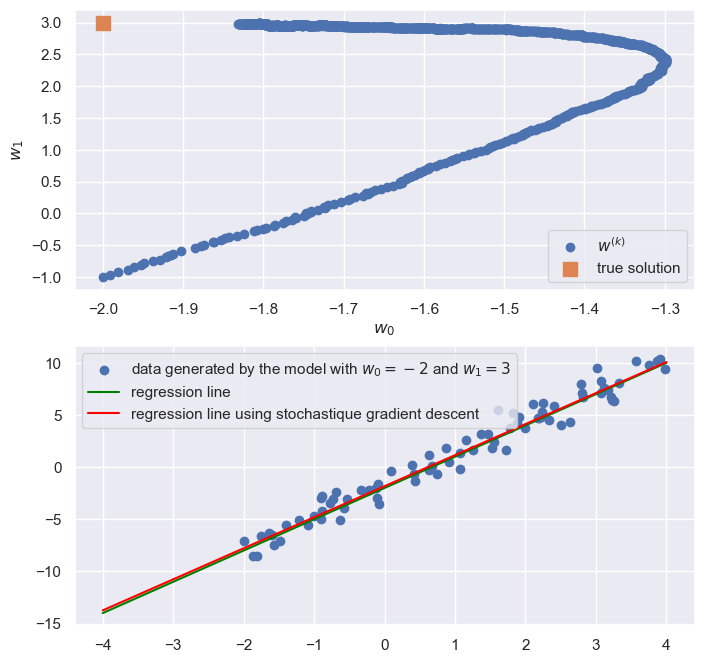

In [106]:
X, Y = generate_data(200)


#We perform the batch SGD on the linear regression problem
w = batch_SGD(X, Y, error_prime, np.array([-2, -1]), step_size=0.001, n_iter=1500, batch_size=10)

x_line = np.linspace(-4, 4, 120)

#Compute the Regression line using the gradient descent
y_line_sgd = w[-1, 0] + w[-1, 1]*x_line

#Xompute the regression line 
y_line = -2 +3*x_line


fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].scatter(w[:, 0], w[:, 1], label="$w^{(k)}$")
ax[0].scatter(-2, 3, marker="s", s=100, label="true solution")
ax[0].set_xlabel("$w_0$")
ax[0].set_ylabel("$w_1$")
ax[0].legend()

# PLot of the data,the regression line and the regression line using gradient descent
ax[1].scatter(x, y, label="data generated by the model with $w_0 = -2$ and $w_1 =3$")
ax[1].plot(x_line, y_line, c="green", label="regression line")
ax[1].plot(x_line, y_line_sgd, label="regression line using stochastique gradient descent", c="red")
ax[1].legend()


plt.show()

Q15. Show that the SGD iterates do not converge.

Text(0.5, 1.0, 'errors against iterations for the last iterations')

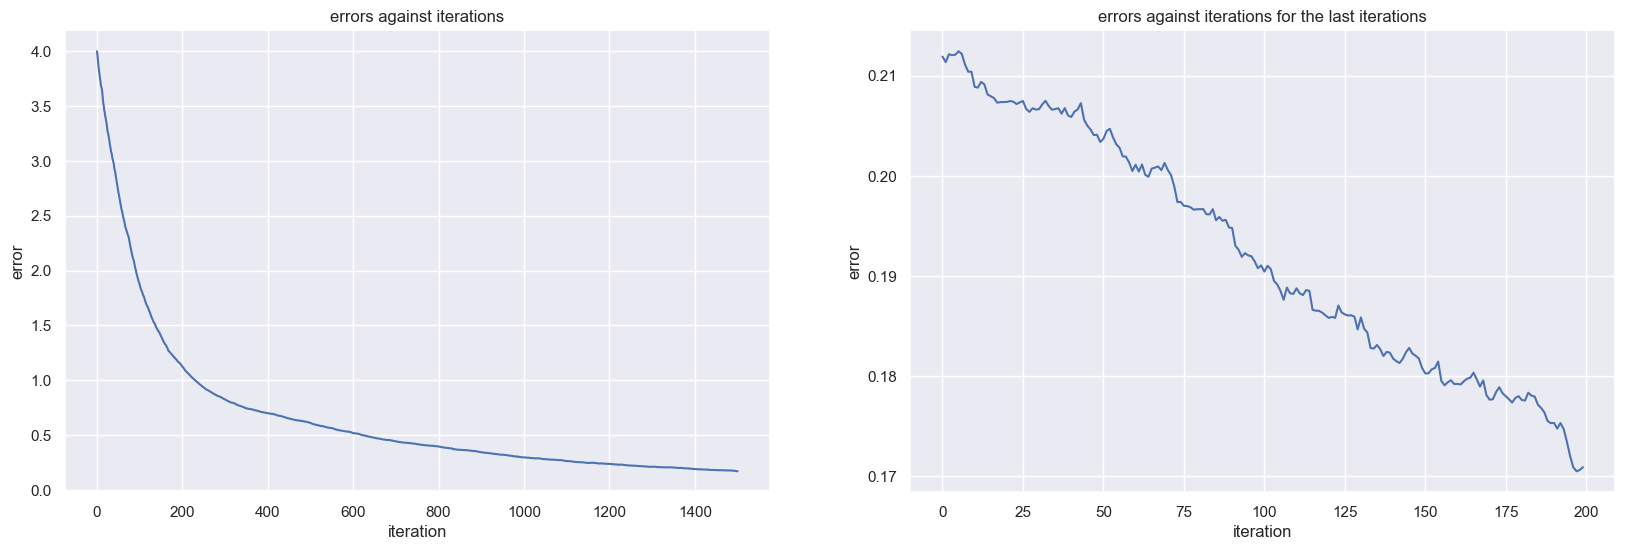

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sol = np.array([-2, 3])
error = np.linalg.norm(sol - w, axis=1)

ax[0].plot(error)
ax[0].set_xlabel("iteration")
ax[0].set_ylabel("error")
ax[0].set_title("errors against iterations")

ax[1].plot(error[-200:])
ax[1].set_xlabel("iteration")
ax[1].set_ylabel("error")
ax[1].set_title("errors against iterations for the last iterations")




Even if the error seams to stabilize around 0 on the graphnon the left, when we zoom on the last iteration of the error, we see that the value are not at 0. Instead, they are fluctuating over 0.05

Stochastic Gradient Descent (SGD) updates parameters more frequently compared to standard Gradient Descent (GD) because it processes only a batch of the training data in each iteration. However, the updates can introduce more noise, leading to oscillations in the optimization path. This is why we see those oscillation on the graph in the right 

Q16. (Optional) Show that when the SGD iterates seem to be stabilize, they stay in a neighborhood with length which decreases linearly with the learning rate.

In [84]:
steps = np.linspace(0.1, 0.0001, 100)
lengths = []
i = 0
w_star = np.array([-2, 3])

for step in steps:
    w = batch_SGD(X, Y, error_prime, np.array([1, -1]), step_size=step, n_iter=10000, batch_size=10)
    last_errors = np.linalg.norm(w_star-w[-100:, :], axis=1)
    lengths.append(np.max(last_errors) - np.min(last_errors))
    i += 1

Text(0.5, 1.0, 'Relationship between the step size/learning_rate and the error length')

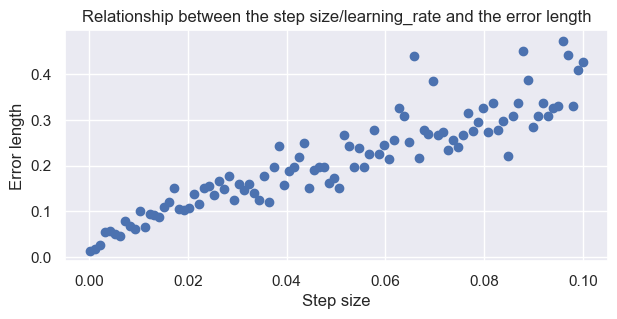

In [108]:
fig, ax = plt.subplots(figsize=(7,3))
ax.scatter(steps,lengths)
ax.set_xlabel("Step size")
ax.set_ylabel("Error length")
ax.set_title("Relationship between the step size/learning_rate and the error length")


We see that there the error length decrease linearly as the step size decrease